# **Import libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Lectura CSV**

In [3]:
links = pd.read_csv('./data/links.csv')
movies = pd.read_csv('./data/movies.csv')
ratings = pd.read_csv('./data/ratings.csv')
tags = pd.read_csv('./data/tags.csv')

# **Anális Exploratorio de Datos**

## **1 - links**

In [4]:
links

,movieId,imdbId,tmdbId
0,186,113986,11472.0
1,271,113691,28313.0
2,322,114594,20306.0
3,399,113173,278939.0
4,404,109339,316098.0
...,...,...,...
1495,291042,5712474,433763.0
1496,291050,2022384,210048.0
1497,291056,1292655,42749.0
1498,291070,4220166,326261.0


### **1.2 - número películas con únicamente un imdbId o un tmdbId**

**Objetivo:** Investigación para identificar si existen películas que solo tienen registro en una de las bases de datos (IMDb o TMDB) y no en ambas.

**Conclusión:** Como podemos observar el resultado es 0 en ambos casos, lo que nos muestra que todas las películas en esta base de datos tienen ambos links asegurando que no faltan datos de ninguna de las dos plataformas (IMDb y TMDb).








In [ ]:
only_imdbId = links[links['tmdbId'].isnull()]['movieId'].nunique()
only_tmdbId = links[links['imdbId'].isnull()]['movieId'].nunique()

print(f"solo imdbId: {only_imdbId}")
print(f"solotmdbId: {only_tmdbId}")

solo imdbId: 0
solotmdbId: 0


## **2 - movies**

In [20]:
movies

,movieId,title,genres,year,director,actors
0,284963,10 Days of a Good Man,Crime|Mystery|Thriller,2023.0,Uluç Bayraktar,"Nejat İşler, Nur Fettahoğlu, Şenay Gürler"
1,190101,The Pistol Shrimps,Documentary,2016.0,Brent Hodge,"Aubrey Plaza, Molly Hawkey, Angela Trimbur"
2,279130,Private Alexandria,Crime|Mystery|Thriller,2005.0,Sandra Nashaat,"Ahmed Ezz, Ghada Adel, Khaled Saleh"
3,171005,Rufus 2,Children|Comedy|Fantasy,2017.0,Savage Steve Holland,"Jace Norman, Davis Cleveland, Haley Tju"
4,32168,Or (a.k.a. My Treasure),Drama,2004.0,NaN,NaN
...,...,...,...,...,...,...
1495,122764,Napoleon,Adventure|Children,1995.0,Mario Andreacchio,"Jamie Croft, Philip Quast, Carole Skinner"
1496,229707,Seduced by My Neighbor,Thriller,2018.0,Sam Irvin,"Andrea Bogart, Trevor St. John, Sierra McCormick"
1497,101646,Night Across the Street (La noche de enfrente),Drama,2012.0,Raúl Ruiz,"Christian Vadim, Sergio Hernández, Valentina V..."
1498,221706,Dinner with the Alchemist,Drama|Mystery,2016.0,Kevin Good,"Dan Istrate, Dionne Audain, Megan Graves"


### **2.1 - Frecuencia de género**

**Objetivo:** Observar el genero más frecuentado de las películas.

**Conclusion:** Graficando los resultados obtenidos en un diagrama de barras para una mejor visualización, observamos que el genero 'Drama' y 'Comedia' serían los más frecuentados por los usuarios.

genres
Drama                 570
Comedy                394
Thriller              203
Romance               188
Action                171
Horror                164
Documentary           145
(no genres listed)    125
Crime                 122
Adventure             106
Sci-Fi                 94
Mystery                85
Animation              69
Fantasy                67
Children               66
War                    41
Western                28
Musical                17
Film-Noir               6
IMAX                    2
Name: count, dtype: int64


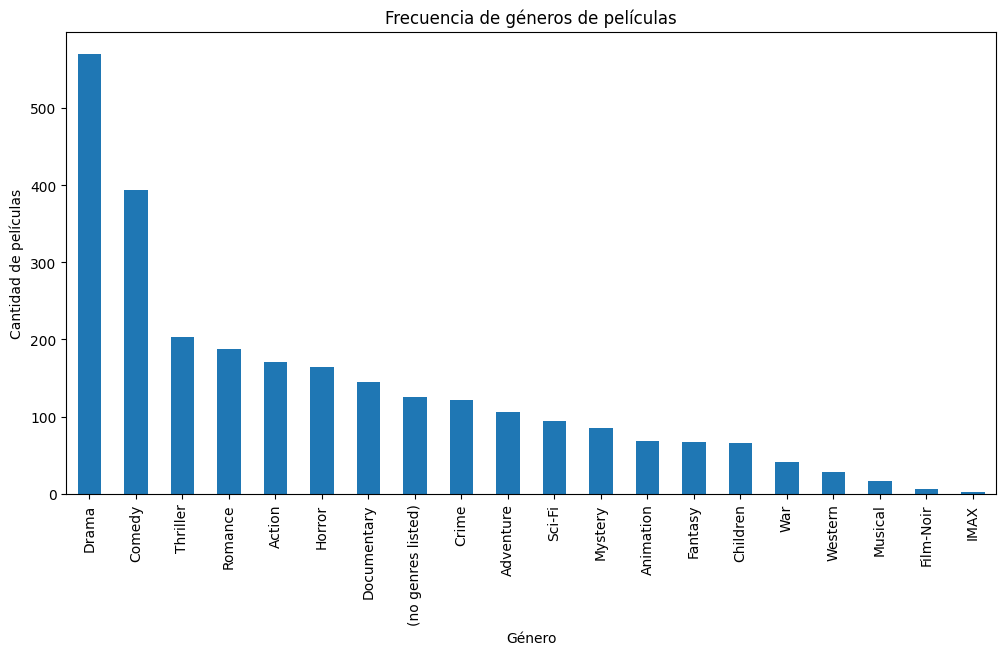

In [ ]:
# Frecuencia de cada género para ver popularidad
genre_counts = movies['genres'].str.split('|').explode().value_counts()
print(genre_counts)

genre_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Frecuencia de géneros de películas')
plt.xlabel('Género')
plt.ylabel('Cantidad de películas')
plt.show()

### **2.2 - Cantidad de péliculas por año**

**Objetivo:** Conocer la cantidad de películas lanzadas por año.

**Conclusión:** Observamos mediante el gráfico un aumento exponencial a partir del año 2000.

Para determinar el año con la mayor cantidad de películas, realizamos un análisis en el subapartado 2.2.1, donde obtuvimos que 2015 es el año con el mayor número.

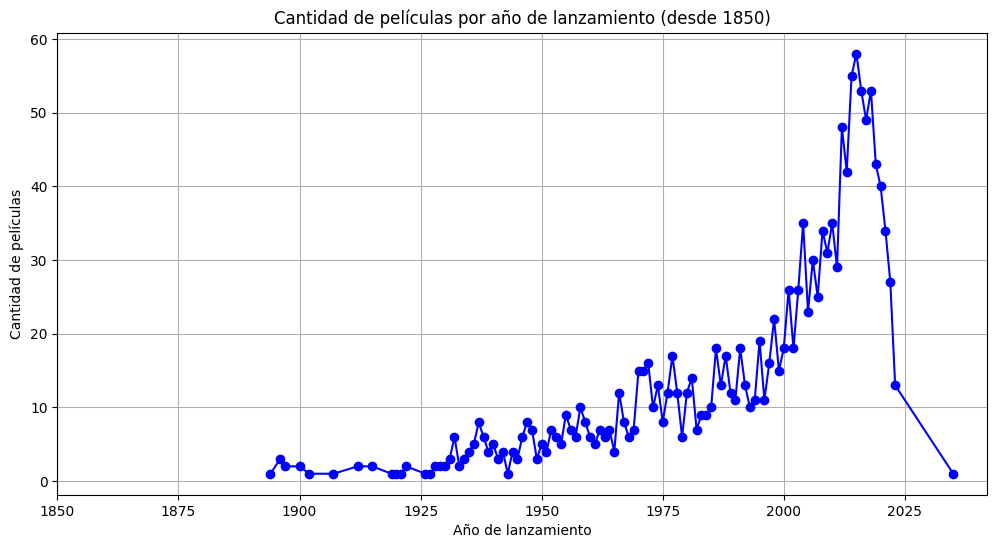

In [ ]:
# Contar la cantidad de películas por año
movies_per_year = movies['year'].value_counts().sort_index()

movies_per_year_filtered = movies_per_year[movies_per_year.index >= 1850]

plt.figure(figsize=(12, 6))
plt.plot(movies_per_year_filtered.index, movies_per_year_filtered.values, marker='o', linestyle='-', color='b')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de películas')
plt.title('Cantidad de películas por año de lanzamiento (desde 1850)')
plt.grid(True)
plt.xlim(left=1850)
plt.show()


#### **2.2.1 - Año con más peliculas**

In [ ]:
year_with_most_movies = movies_per_year.idxmax()
print(f"El año con más películas lanzadas es: {year_with_most_movies}")

El año con más películas lanzadas es: 2015.0


### **2.3 - Directores y Actores más frecuentes**

**Objetivo:** Obtener los diez directores y actores más frecuentes.

**Conclusión:** Gracias a este análisis observamos que en directo existe el valor 'Unknown', siendo este además el más frecuentado con un total de 18. Este valor se decide mantaner con el fin de mantaner el máximo número películas.

In [ ]:
# asegurarse de que no haya valores nulos
directors_counts = movies['director'].value_counts()

print("Los 10 directores más frecuentes:")
print(directors_counts.head(10))

# para obtener cada actor en una fila
actors_counts = movies['actors'].str.split(',').explode().str.strip().value_counts()

print("\nLos 10 actores más frecuentes:")
print(actors_counts.head(10))


Los 10 directores más frecuentes:
director
Unknown               18
Kurt Neumann           5
Fritz Lang             3
Takashi Shimizu        3
Friz Freleng           3
Mervyn LeRoy           3
Roy Ward Baker         3
Edward Buzzell         3
Antonio Margheriti     3
Alberto De Martino     3
Name: count, dtype: int64

Los 10 actores más frecuentes:
actors
Kim Basinger         4
Charles Boyer        4
Mel Blanc            4
Kevin Hart           4
Mark Ruffalo         3
Kelly Preston        3
Jean Reno            3
Michelle Pfeiffer    3
Diego Abatantuono    3
Sharon Stone         3
Name: count, dtype: int64


### **2.4 - Visualización de géneros**

**Objetivo:** Obtener todos los géneros existentes.

**Conclusión:** Observamos que una película puede estar registrada con más de un género. Visualizamos que un elemento del array puede tener varios generos y no un género por elemento. Esto nos es útil para una mejor comprensión de la base de datos.

In [ ]:
movies['genres'].unique()

array(['Crime|Mystery|Thriller', 'Documentary', 'Children|Comedy|Fantasy',
       'Drama', 'Comedy|Drama|Romance', 'Thriller', 'Crime',
       'Drama|Mystery', 'Adventure|Drama', 'Comedy',
       'Adventure|Children|Fantasy|Romance', 'Action|War',
       'Action|Comedy|Crime|Romance', 'Drama|Thriller', 'Adventure',
       'Action|Drama|Thriller', '(no genres listed)',
       'Animation|Drama|War', 'Action|Crime|Thriller',
       'Adventure|Animation|Fantasy', 'Drama|Romance|War', 'Comedy|Drama',
       'Adventure|Comedy|Fantasy|Musical|Romance', 'Fantasy|Sci-Fi',
       'Action|Comedy|Drama', 'Crime|Drama',
       'Crime|Drama|Mystery|Thriller', 'Horror|Sci-Fi',
       'Action|Adventure|Comedy|Sci-Fi', 'Adventure|Fantasy',
       'Drama|Romance', 'Adventure|Animation|Comedy|Fantasy|Romance',
       'Adventure|Fantasy|Horror', 'Comedy|Drama|Fantasy',
       'Comedy|Horror', 'Action|Sci-Fi', 'Action|Documentary|Drama',
       'Crime|Drama|Thriller', 'Adventure|Children|Comedy',
       'D

### **2.5 - Elemento con el máximo número de generos**

**Objetivo:** Tras conocer que dentro del array de generos los elementos pueden estar compuestos por más de un género ( sección 2.4), el objetivo es conocer el máximo número de géneros en un elemento para posteriormente en la limpieza de datos tener dichos generos separados por columnas con el fin de obtener una sencilla accesibilidad y poder aplicar el método one hot enconding, que posteriormente usaremos para una de las funciones de recomendación.

**Conclusión:** Obtenemos que el máximo número de generos en un elemento es 6.

In [ ]:
genres_array = movies['genres'].unique()

max_genres_count = 0
max_genres_element = ""

for genres in genres_array:
    # Contar el número de géneros separando por '|'
    count = len(genres.split('|'))

    if count > max_genres_count:
        max_genres_count = count
        max_genres_element = genres

print(f"Elemento con el máximo número de géneros: '{max_genres_element}'")
print(f"Número de géneros: {max_genres_count}")

Elemento con el máximo número de géneros: 'Action|Adventure|Comedy|Fantasy|Horror|Thriller'
Número de géneros: 6


### **2.6 - Comprobación películas sin géneros**

**Objetivo:** Ver si existen géneros con valores NaN.

**Conclusión**: No hay ningún valor NaN por lo que podemos concluir que todos los registros de películas tienen asignados géneros

In [ ]:
nan_genres = movies[movies['genres'].isna()]
nan_genres

Películas con géneros NaN:


,movieId,title,genres,year,director,actors


### **2.7 - Películas con algún valor NaN en cualquier columna**

**Objetivo:** En el apartado anterior hemos visto que no hay valores NaN para los géneros ya que era la columna que estabamos tratando.

Para asegurarnos si es el mismo caso para el resto de columnas realizamos una exploración de valores NaN por todas las columnas.

**Conclusión:** Observamos que las columnas director y actor tiene valores NaN.
Además vemos que en genres aunque no haya valores NaN si que hay genres (no genres listed) y que en director además de valores NaN hay valores 'Unknown'.

In [ ]:
movies_with_nan = movies[movies.isna().any(axis=1)]
movies_with_nan

,movieId,title,genres,year,director,actors
4,32168,Or (a.k.a. My Treasure),Drama,2004.0,NaN,NaN
23,209973,The Dragon Dentist: Tengumushi,Animation|Drama|War,2017.0,NaN,NaN
48,166026,Tetra Vaal,(no genres listed),2004.0,Neill Blomkamp,NaN
53,279772,Let There Be Drums!,(no genres listed),NaN,Justin Kreutzmann,"Steven Adler, Jerry Allison, Michael Anthony"
64,172907,The Infinite Worlds of H.G. Wells,Drama|Romance|Sci-Fi,2001.0,NaN,NaN
...,...,...,...,...,...,...
1416,286783,Poor Things,Comedy|Romance|Sci-Fi,NaN,Yorgos Lanthimos,"Emma Stone, Mark Ruffalo, Willem Dafoe"
1422,100169,After Porn Ends,Documentary,2010.0,NaN,NaN
1451,125093,Playing House,Thriller,2010.0,NaN,NaN
1466,187965,Sanctuary,(no genres listed),NaN,Unknown,NaN


### **2.8 -películas con generos (no genres listed)**

**Objetivo:** Tras detectar la existencia de (no genres listed) queremos obtener cuantas.

**Conclusión:** nos devuleve una tabla con 125 rows, por lo que hay 125 peliculas sin géneros listados

In [ ]:
no_genres_movies = movies[movies['genre_1'] == '(no genres listed)']
no_genres_movies

,movieId,title,year,director,actors,genre_1,genre_2,genre_3
22,157089,Popeye Doyle,1986.0,Peter Levin,"Ed O'Neill, Matthew Laurance, Candy Clark",(no genres listed),NaN,NaN
30,219563,Changfeng Town,2019.0,Wang Jing,"Song Daiwei, Liu Xinrong, Pema Jyad",(no genres listed),NaN,NaN
38,128145,'77,2007.0,Patrick Read Johnson,"John Francis Daley, Austin Pendleton, Colleen ...",(no genres listed),NaN,NaN
48,166026,Tetra Vaal,2004.0,Neill Blomkamp,NaN,(no genres listed),NaN,NaN
53,279772,Let There Be Drums!,NaN,Justin Kreutzmann,"Steven Adler, Jerry Allison, Michael Anthony",(no genres listed),NaN,NaN
...,...,...,...,...,...,...,...,...
1402,135883,Romantic Warriors,2003.0,JK Youn,"Kim Min-jong, Choi Sung-kook, Jin Jae-young",(no genres listed),NaN,NaN
1437,151179,Brooklyn Orchid,1942.0,Kurt Neumann,"William Bendix, Joe Sawyer, Marjorie Woodworth",(no genres listed),NaN,NaN
1450,212329,Drown Among the Dead,2018.0,Rubén Gutiérrez,"Horacio Salinas, Anajosé Aldrete",(no genres listed),NaN,NaN
1466,187965,Sanctuary,NaN,Unknown,NaN,(no genres listed),NaN,NaN


### **2.9 - Relación de popularidad de los pricipales 5 generos a lo largo de los años**

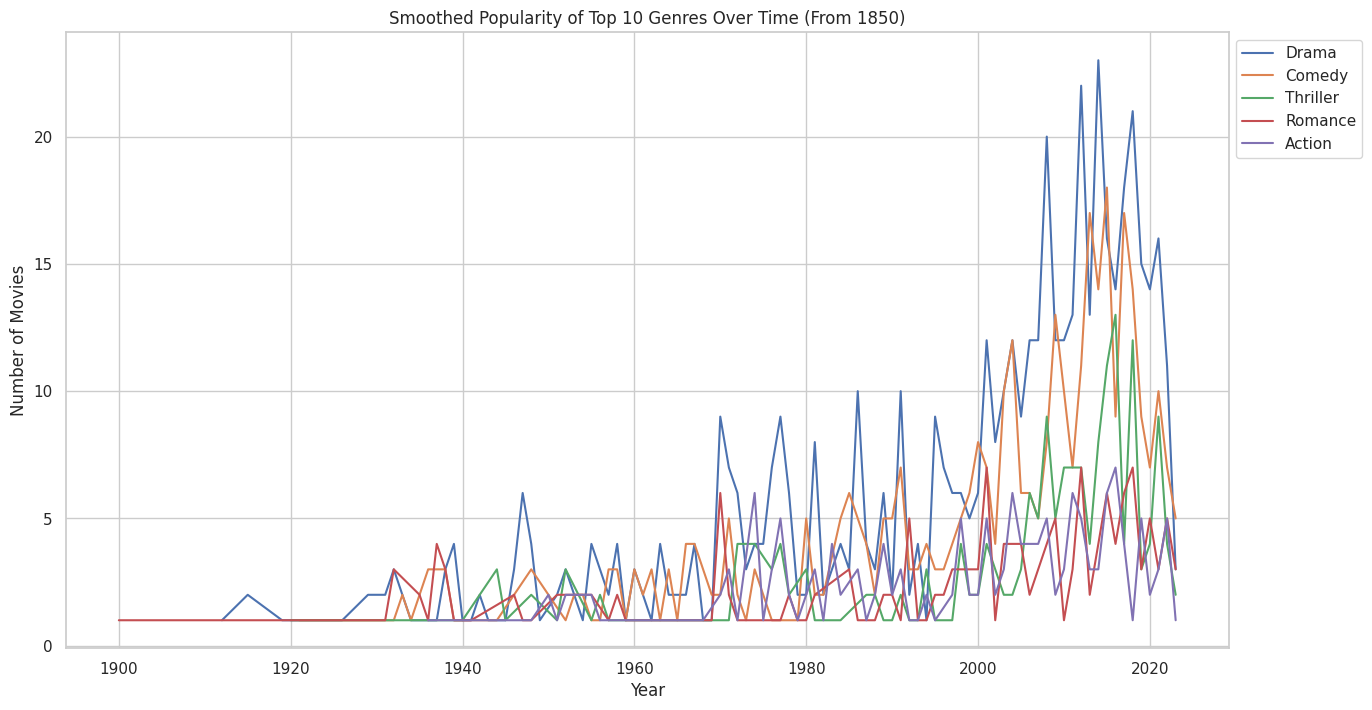

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar años a partir de 1850
movie_genres_by_year = movie_genres_by_year[movie_genres_by_year['year'] >= 1850]

# Calcular el total de películas por género y seleccionar los 10 más populares
top_genres = movie_genres_by_year['genres'].value_counts().nlargest(5).index

# Filtrar los datos para incluir solo estos 10 géneros
top_genre_data = movie_genres_by_year[movie_genres_by_year['genres'].isin(top_genres)]

# 2. Agregar el número de películas por género y año
genre_counts_by_year = top_genre_data.groupby(['year', 'genres']).size().reset_index(name='count')

# 3. Crear el gráfico de líneas con suavizado
plt.figure(figsize=(15, 8))  # Tamaño del gráfico

# Graficar cada uno de los 10 géneros más populares con un suavizado
for genre in top_genres:
    genre_data = genre_counts_by_year[genre_counts_by_year['genres'] == genre]
    sns.lineplot(x=genre_data['year'], y=genre_data['count'], label=genre)

# Etiquetas y título
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Smoothed Popularity of Top 10 Genres Over Time (From 1850)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Leyenda fuera del gráfico
plt.grid(True)
plt.show()


### **2.10 - películas con director Unknown**

**Objetivo:** Tras detectar la existencia del valor Unknown en directores, visualizamos quienes.

**Conclusión:** Obtenemos una tabla con los directores Unknown, la cual esta formada por 18 directores.

In [ ]:
unknown_director_movies = movies[movies['director'] == 'Unknown'].reset_index(drop=True)
unknown_director_movies

,movieId,title,genres,year,director,actors
0,173653,Dumpling Brothers,Comedy|Drama,2013.0,Unknown,NaN
1,199636,Meet the Trumps: From Immigrant to President,Documentary,2017.0,Unknown,"Donald Trump, Fred Trump, Ivana Trump"
2,241626,Cheeni,Drama,2020.0,Unknown,NaN
3,262037,Sharkproof,Action|Comedy,2012.0,Unknown,"Jon Lovitz, Cameron Van Hoy, Kinga Kierzek"
4,177789,NHL Greatest Moments,Documentary,2006.0,Unknown,"Wayne Gretzky, Mario Lemieux, Patrick Roy"
5,175991,Scribe,Thriller,2017.0,Unknown,NaN
6,157805,Freedom,Adventure|Animation|Romance|Sci-Fi,2006.0,Unknown,NaN
7,226650,Quiz,(no genres listed),2020.0,Unknown,NaN
8,292395,Lewis & Clark: The Journey of the Corps of Dis...,(no genres listed),1997.0,Unknown,NaN
9,226478,"Happy Tree Friends, Volume 2: Second Serving",(no genres listed),2003.0,Unknown,NaN


### **2.11 - películas con director NaN**

**Objetivo:** Ver los directores con valores NaN

**Conclusión:** Obtenemos que hay 60 directores con valor NaN

In [ ]:
movies_with_nan_director = movies[movies['director'].isna()].reset_index(drop=True)
movies_with_nan_director

,movieId,title,genres,year,director,actors
0,32168,Or (a.k.a. My Treasure),Drama,2004.0,NaN,NaN
1,209973,The Dragon Dentist: Tengumushi,Animation|Drama|War,2017.0,NaN,NaN
2,172907,The Infinite Worlds of H.G. Wells,Drama|Romance|Sci-Fi,2001.0,NaN,NaN
3,33921,Retrogade,Action|Adventure|Sci-Fi,2004.0,NaN,NaN
4,155986,Mad Ship,(no genres listed),2012.0,NaN,NaN
5,145100,If Tomorrow Comes,Crime|Drama|Mystery,1986.0,NaN,NaN
6,109889,Cranford,Drama,2007.0,NaN,NaN
7,141201,Death of a Doctor,Drama,1991.0,NaN,NaN
8,230423,The Nativity,Drama,2010.0,NaN,NaN
9,2031,"Million Dollar Duck, The (a.k.a. $1,000,000 Duck)",Children|Comedy,1971.0,NaN,NaN


### **2.12 - Títulos duplicados**

**Objetivo:** Obtener si existen título de peículas duplicados.

**Conclusión:** Obtenemos 3 películas con títulos duplicados

In [ ]:
duplicate_titles = movies[movies.duplicated(subset=['title'], keep=False)].reset_index(drop=True)
duplicate_titles

,movieId,title,genres,year,director,actors
0,124575,The Wind in the Willows,Adventure|Animation|Children|Fantasy,1983.0,Chris Taylor,"Richard Pearson, Michael Hordern, Ian Carmichael"
1,230015,The Wind in the Willows,Animation|Children,1949.0,James Algar,"Basil Rathbone, Eric Blore, J. Pat O'Malley"
2,142691,Evidence,Horror,2011.0,Howie Askins,"Ryan McCoy, Brett Rosenberg, Abigail Richie"
3,182669,Obsession,Drama|Romance|Thriller,1997.0,Peter Sehr,"Heike Makatsch, Daniel Craig, Seymour Cassel"
4,109034,Evidence,Documentary,1995.0,Godfrey Reggio,NaN
5,207720,Obsession,Thriller,2018.0,Goran Dukić,"Mekhi Phifer, Elika Portnoy, Brian Matney"


## **3 - ratings**

In [6]:
ratings

,userId,movieId,rating,timestamp
0,1,322,4.0,944053801
1,1,1041,5.0,944253134
2,1,1276,3.0,944248943
3,1,1693,5.0,944253134
4,1,1923,2.0,943228491
...,...,...,...,...
637393,200948,2997,4.0,1203427254
637394,200948,4886,4.5,1203427142
637395,200948,8531,0.5,1214128745
637396,200948,33679,3.5,1203439804


### **3.1 - Histrograma y densidad de calificaciones**

**Objetivo:** Hacer uso del histograma y la curva de densidad para visualizar la distribución de las calificaciones.

**Conclusión:** Mediante el gráfico obtenido observamos que la calificación de 4 estrellas es la mas utilizada por los usuarios. Además podemos observar que los ususarios suelen tener preferencia en dar valores de estrellas enteros que con decimal ya que todos los valores enteros son mayores que los valores decimales adyacentes.

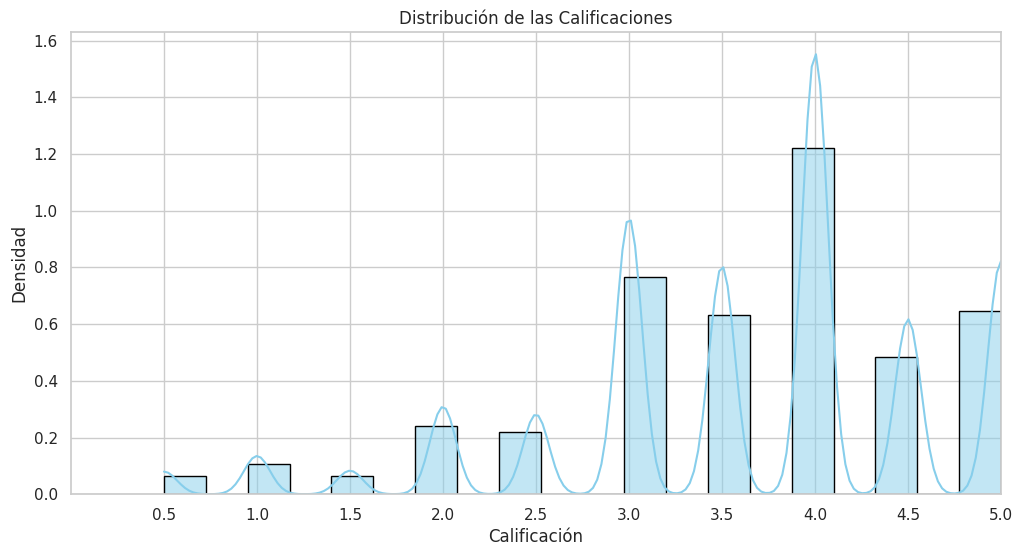

In [44]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(ratings['rating'], bins=20, kde=True, color='skyblue', stat='density', edgecolor='black')
plt.title('Distribución de las Calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Densidad')
plt.xticks([x / 2 for x in range(1, 11)])  # marcadores de 0.5 a 5
plt.xlim(0, 5)
plt.grid(True)
plt.show()


### **3.2 - Número de películas en cada calificación**

**Objetivo:** Visualizar la cantidad de películas asignadas a cada calificación.

**Conclusión:** Obtenemos que la calificación más usada para las películas es la de 4 estrellas (como se veía en el histrograma de la sección 3.2) con 175075 películas calificadas con esa puntuación.  

In [45]:
rating_counts = ratings.groupby('rating')['movieId'].count()
rating_counts

,movieId
rating,
0.5,8994
1.0,15189
1.5,9345
2.0,34745
2.5,31694
3.0,109741
3.5,90591
4.0,175075
4.5,69490


### **3.3 - Promedio de las calificaciones por película**

**Objetivo:** Calcular la calificación promedio de cada película

**Conclusión:** Podemos ver cuales de froma rápida cuales han sido las mejor y peor valoradas. Por ejemplo, "Love, Game, Match" y "A Ballad of Love," han recibido calificaciones perfectas de 5.0. Por otro lado, existen títulos con calificaciones muy bajas, como "Los Extermineitors" y "Black Cobra Woman,".

In [46]:
average_ratings = ratings.groupby('movieId')['rating'].mean().reset_index()

average_ratings.rename(columns={'rating': 'average_rating'}, inplace=True)

#Combinar con el DataFrame de películas
merged_df = pd.merge(average_ratings, movies[['movieId', 'title']], on='movieId')

sorted_movies = merged_df.sort_values(by='average_rating', ascending=False)
print(sorted_movies[['title', 'average_rating']])


                           title  average_rating
1334           Love, Game, Match             5.0
1312            A Ballad of Love             5.0
1153  The Return of Charlie Chan             5.0
772                   Bus Driver             5.0
1176           Beyond Puppy Love             5.0
...                          ...             ...
1121          Los Extermineitors             0.5
688            Black Cobra Woman             0.5
1391             The Incantation             0.5
1109                   Human Zoo             0.5
1276                 The Sandman             0.5

[1433 rows x 2 columns]


### **3.4 - Cantidad de calificaciones por usuario**

**Objetivo:** Saber la cantidad de clasificaciones que ha hecho cada ususario.

**Conclusión:** Observamos que todos los usuarios han hecho al menos una clasificación. Obtenemos el número de usuarios que solo han realizado una valoración y el número de usuarios que han hecho más de una valoración.

In [47]:
ratings_per_user = ratings.groupby('userId').size().reset_index(name='rating_count')

zero_users = ratings_per_user[ratings_per_user['rating_count'] < 1]
active_users = ratings_per_user[ratings_per_user['rating_count'] > 1]
one_time_users = ratings_per_user[ratings_per_user['rating_count'] == 1]

print("Cantidad total de usuarios no han hecho ninguna valoración:", zero_users['userId'].count())
print("Cantidad total de usuarios activos (más de 1 valoración):", active_users['userId'].count())
print("Cantidad total de usuarios que solo han hecho una valoración:", one_time_users['userId'].count())

Cantidad total de usuarios no han hecho ninguna valoración: 0
Cantidad total de usuarios activos (más de 1 valoración): 103048
Cantidad total de usuarios que solo han hecho una valoración: 46217


### **3.5 - Cambio de las calificaciones a lo largo de los años**

**Objetivo:** Analizar cómo han variado las calificaciones de las películas a lo largo de los años.

**Conclusión:** Podemos observar un ascenso en las calificaciones de las películas de 1995. A los inicios de los años 2000 comienza a bajar y para el año 2005 ocurre descenso significativo en las calificaciones de las películas. Posterior a este año la gráfica se vuelve ascendente.

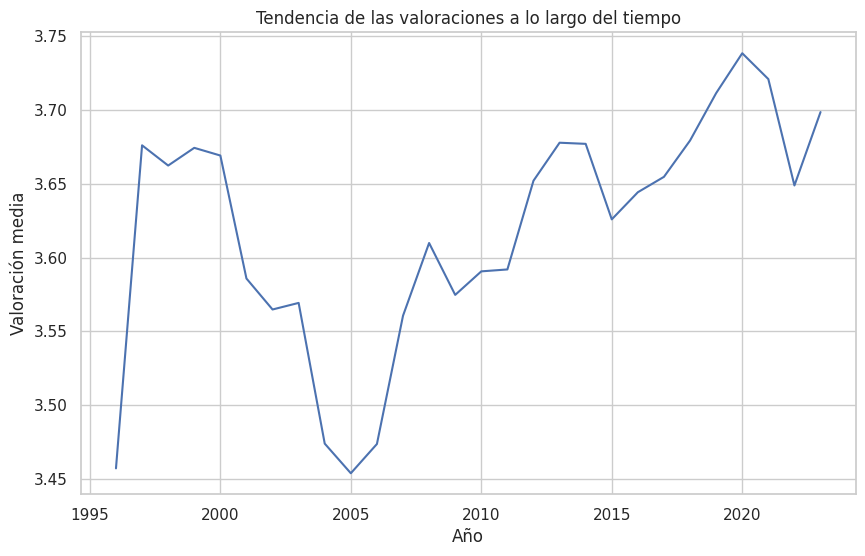

In [48]:
#columna 'timestamp' a datetime
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

# agrupar por año y calcular la valoración media
ratings_by_year = ratings.groupby(ratings['timestamp'].dt.year)['rating'].mean()

plt.figure(figsize=(10, 6))
plt.plot(ratings_by_year.index, ratings_by_year.values)
plt.xlabel('Año')
plt.ylabel('Valoración media')
plt.title('Tendencia de las valoraciones a lo largo del tiempo')
plt.grid(True)
plt.show()

### **3.6 - Número de calificaciones por película**

**Objetivo:** Obtener las películas con más calificaciones.

**Conclusión:** Observamos que la película Monsters, Inc, es la película con mas calificaciones dadas por usuarios.

<ipython-input-66-e2d6ce9367fe>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_ratings', y='title', data=movie_rating_counts_sorted.head(20), palette='viridis') # Show top 20 for clarity


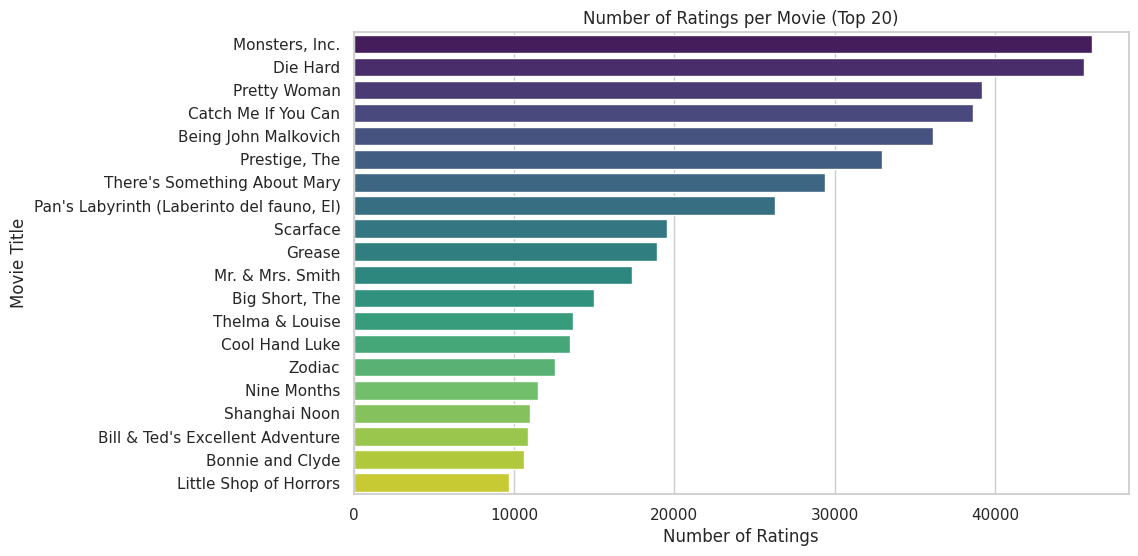

In [66]:
rating_counts_per_movie = ratings.groupby('movieId')['rating'].count()

movie_rating_counts = pd.merge(rating_counts_per_movie, movies[['movieId', 'title']], on='movieId')
movie_rating_counts = movie_rating_counts.rename(columns={'rating': 'num_ratings'})
movie_rating_counts_sorted = movie_rating_counts.sort_values('num_ratings', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='num_ratings', y='title', data=movie_rating_counts_sorted.head(20), palette='viridis') # Show top 20 for clarity
plt.title('Number of Ratings per Movie (Top 20)')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()

### **3.7 - Relación de las calificaciones medias a lo largo de los años en cuanto al género de las películas**

**Objetivo:** Visualizar las calificaciones medias de los géneros a lo largo de los años.

**Conclusión:** Obtenemos una relación que se mantiene relativamente estable a lo largo de los años, excepto en el caso de los géneros de Fantasy, Adventure y Children los cuales comienzan con una media de calificaciones baja seguida con un ascenso significativo que después se mantiene constante como los demás generos

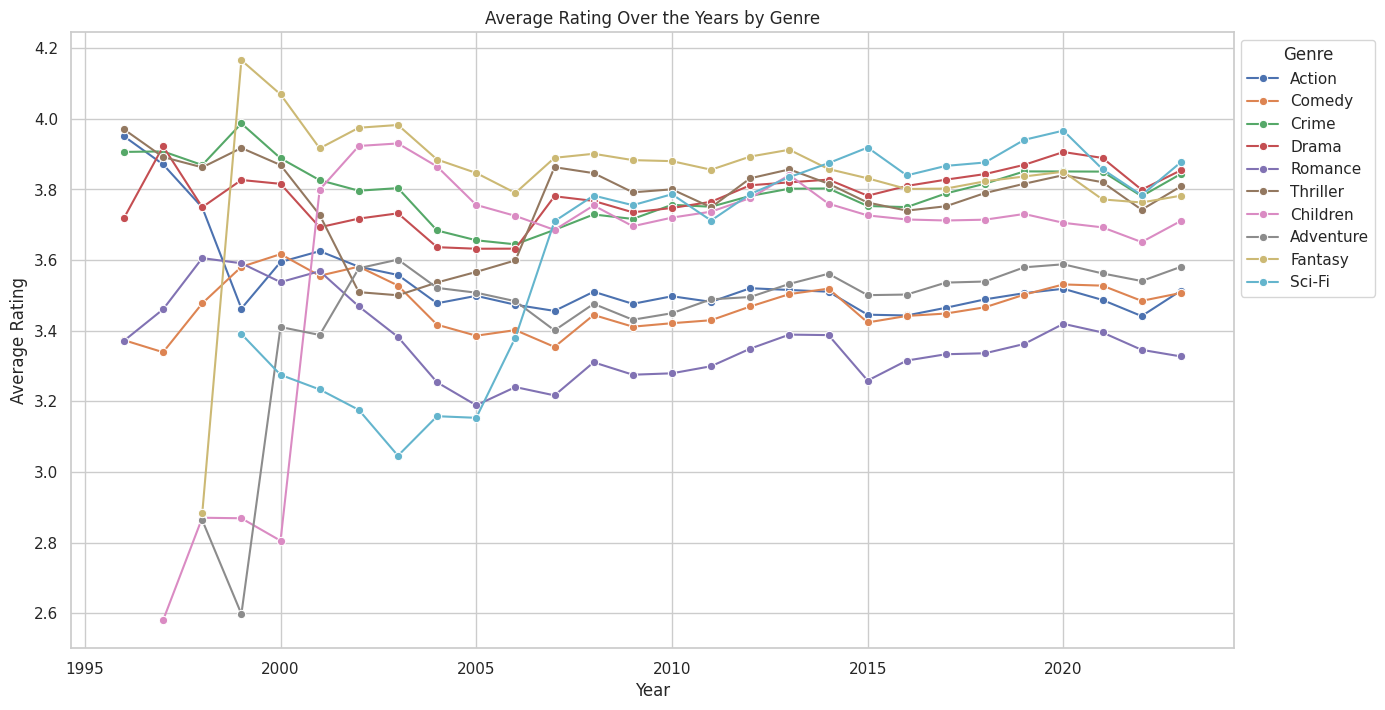

In [80]:
# convertir 'timestamp' a año en el DataFrame ratings
ratings['year'] = pd.to_datetime(ratings['timestamp'], unit='s').dt.year

ratings_with_genres = pd.merge(ratings, movies[['movieId', 'genres']], on='movieId')
ratings_with_genres['genres'] = ratings_with_genres['genres'].str.split('|')
ratings_with_genres = ratings_with_genres.explode('genres')

average_rating_by_genre_year = ratings_with_genres.groupby(['year', 'genres'])['rating'].mean().reset_index()

top_genres = ratings_with_genres['genres'].value_counts().nlargest(10).index
average_rating_by_genre_year = average_rating_by_genre_year[average_rating_by_genre_year['genres'].isin(top_genres)]

plt.figure(figsize=(15, 8))
sns.lineplot(data=average_rating_by_genre_year, x='year', y='rating', hue='genres', marker="o")
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating Over the Years by Genre')
plt.legend(title='Genre', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


## **4 - tags**

In [7]:
tags

,userId,movieId,tag,timestamp
0,109,5294,Bill Paxton,1258426708
1,109,5294,brothers,1258426681
2,109,5294,dumbest twist ever,1258426676
3,109,5294,father-son relationship,1258426695
4,109,5294,insanity,1258426730
...,...,...,...,...
35002,162271,48780,Christian Bale,1305569697
35003,162271,48780,steampunk,1305569700
35004,162271,48780,twist ending,1305569699
35005,162279,4886,Steve Buscemi,1278377370


### **4.1 - Identificación de tags más usados**

**Objetivo:** Obtener los tags mas utilados por los usuarios

**Conclusión:** Vemos que tags más utilizados por los usuarios indican una preferencia por películas con tramas complejas y giros inesperados e interés en historias basadas en hechos reales.

Etiquetas más frecuentes:
tag
twist ending             360
atmospheric              326
surreal                  263
true story               228
funny                    215
based on a true story    207
twists & turns           194
Christian Bale           186
intelligent              174
mystery                  171
Name: count, dtype: int64


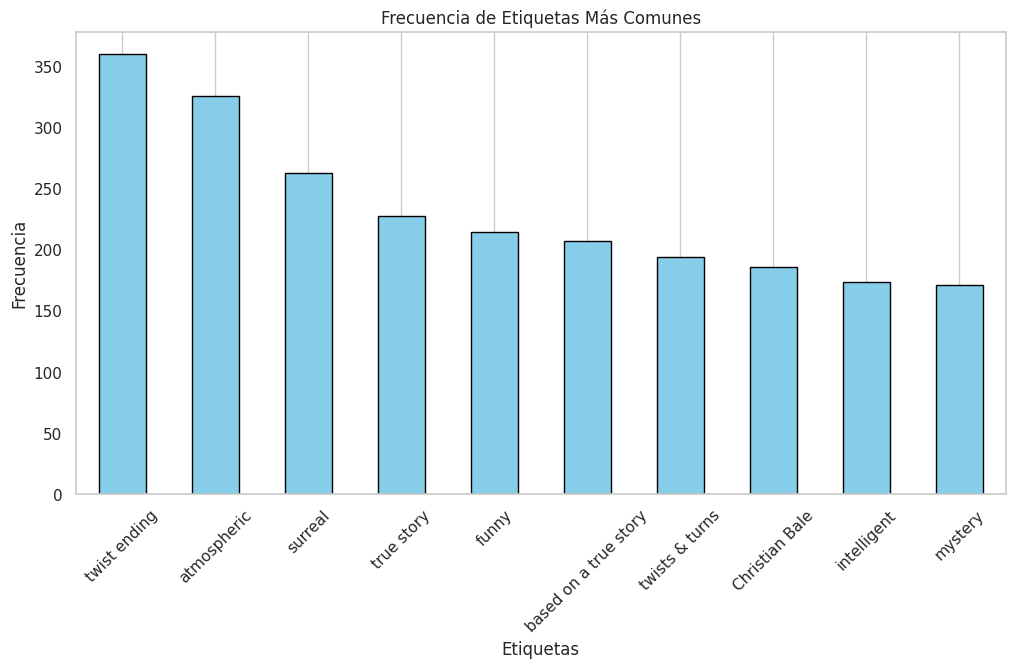

In [ ]:
# contamos la frecuencia de las etiquetas
tag_counts = tags['tag'].value_counts()

# estamos mostrando las 10 etiquetas más fecuentes
top_tags = tag_counts.head(10)
print("Etiquetas más frecuentes:")
print(top_tags)


plt.figure(figsize=(12, 6))
top_tags.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frecuencia de Etiquetas Más Comunes')
plt.xlabel('Etiquetas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### **4.2 - géneros con más tags**

**Objetivo:** Analizar la popularidad de cada género en función de la cantidad de tags utilizados.

**Conclusión:** Los géneros más mencionados, como Drama y Comedia, muestran que a la gente le gusta ver historias emotivas y divertidas, mientras que géneros como Romance y Western tienen mucho menos interés por lo que intuimos que son menos populares.


Generos con más tags:
genre_1
Drama                 11611
Comedy                 6763
Action                 5350
Crime                  4441
Adventure              2593
Horror                 1680
Documentary             573
Animation               417
Thriller                413
Fantasy                 366
Children                359
(no genres listed)      267
Sci-Fi                  112
Romance                  35
Mystery                  17
Western                   6
Musical                   4
Name: tag, dtype: int64


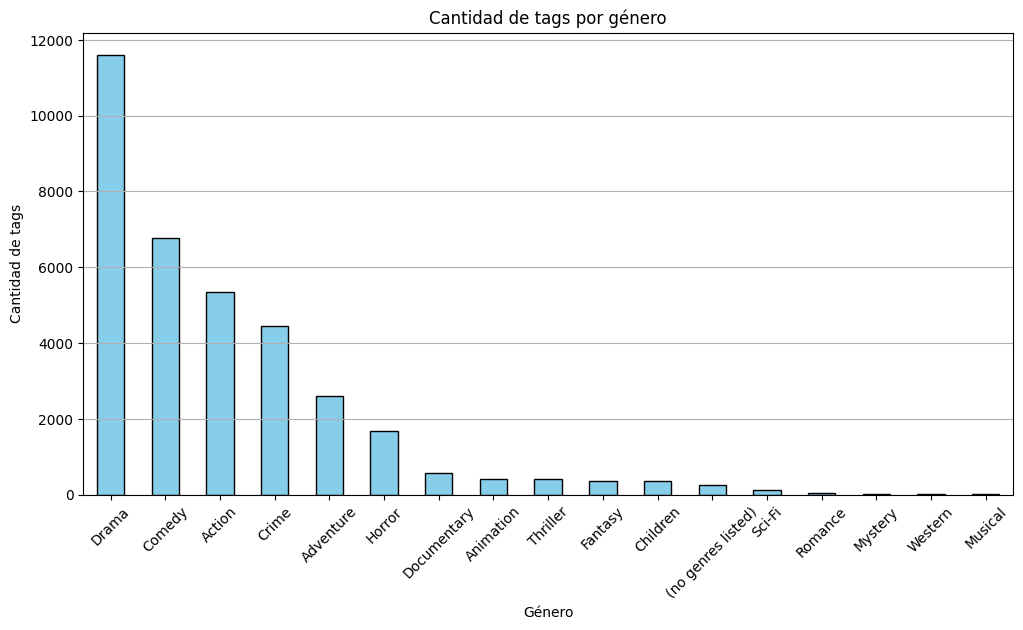

In [ ]:
# genéros con más tags
genre_tag_counts = tags.merge(movies, on='movieId').groupby('genre_1')['tag'].count().sort_values(ascending=False)

print("\nGeneros con más tags:")
print(genre_tag_counts)

plt.figure(figsize=(12, 6))
genre_tag_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cantidad de tags por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de tags')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### **4.3 - películas con más tags**

**Objetivo:** Encontrar las películas con más tags para visualizar cuáles son populares y qué les gusta a los espectadores.

**Conclusión:** Las películas con más tags, como "Prestige" y "Pan's Labyrinth," indican un alto nivel de interés y discusión entre los espectadores.


Películas con más tags:
title
Prestige, The                                2972
Pan's Labyrinth (Laberinto del fauno, El)    2224
Catch Me If You Can                          1785
Die Hard                                     1477
Being John Malkovich                         1449
Big Short, The                               1439
Zodiac                                        886
Scarface                                      823
Monsters, Inc.                                799
Memories of Murder (Salinui chueok)           489
Name: tag, dtype: int64


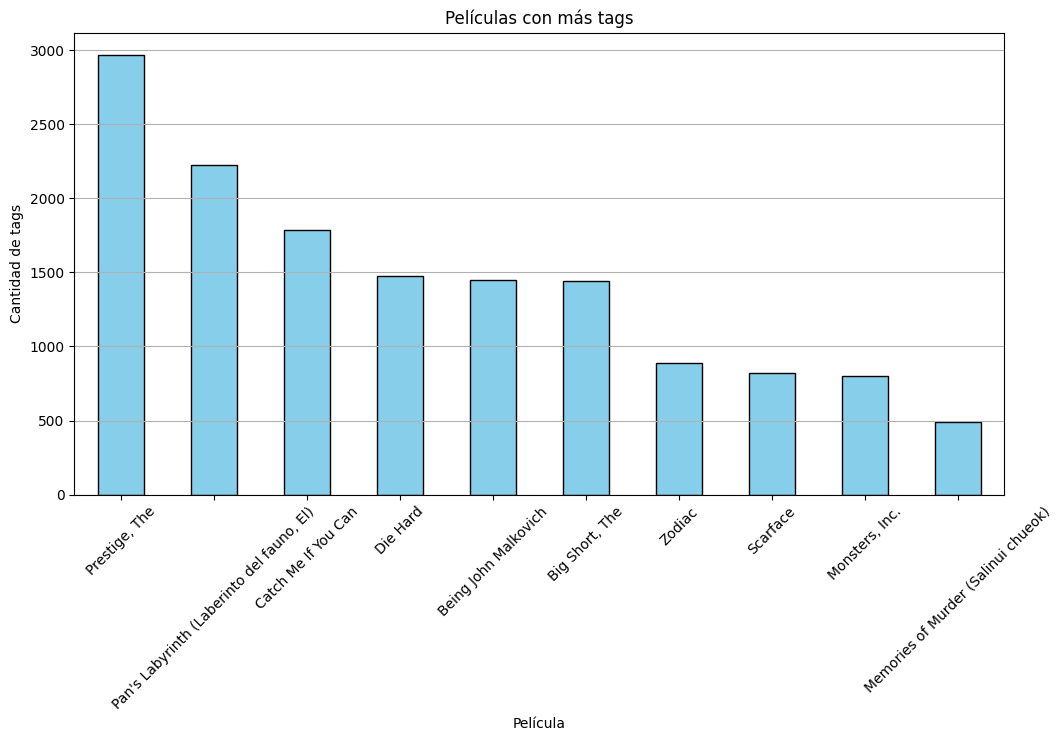

In [ ]:
merged_df = tags.merge(movies, on='movieId')
movie_tag_counts = merged_df.groupby('title')['tag'].count().sort_values(ascending=False)

print("\nPelículas con más tags:")
print(movie_tag_counts.head(10))

plt.figure(figsize=(12, 6))
movie_tag_counts.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Películas con más tags')
plt.xlabel('Película')
plt.ylabel('Cantidad de tags')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()